# **Questão 2**

## **Instruções**



*   Verifique as respostas antes de enviar, veja se elas fazem sentido!
*   Lembre-se de salvar frequentemente!
*   Não envie apenas o notebook, envie a pasta inteira com as imagens!


# **Formulário**

## **Importações**
```
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
```

## **Códigos**
```
# Manipulação de imagens
img = Image.open('nome.extensão')
img = np.array(Image.open('nome.extensão'))
img = img[:, :, :3]
img_pil = Image.fromarray(img_np)
img.save('nome.png')
Image.fromarray(img).save('nome_arquivo.extensao')

# Histograma
plt.bar(range(256), histogram_r, color='red')
plt.bar(range(256), histogram_g, color='green')
plt.bar(range(256), histogram_b, color='blue')

# Detecção de bordas
abs_tg_eixo = np.abs(np.diff(img, axis=eixo, append=0))
```

## **Fórmulas**

### **Grayscale**

Lightness: $\frac{max(R,G,B)+min(R,G,B)}{2}$

Average: $\frac{R+G+B}{3}$

Luminosity: $0.2126 \cdot R + 0.7152 \cdot G + 0.0722 \cdot B$


### **Cor**

$$\begin{bmatrix}
    R \\ G \\ B
\end{bmatrix} = \begin{bmatrix}
    255 \\ 255 \\ 255
\end{bmatrix} - \begin{bmatrix}
    C \\ M \\ Y
\end{bmatrix}$$


**a)** Carregue a imagem **darth_troopers.jpg** presente na pasta e mostre na tela. Verifique a presença do canal alfa e faça o devido tratamento caso ele exista.

(310, 550, 3)


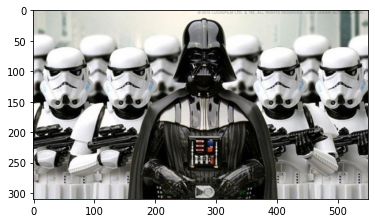

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img = np.array(Image.open('darth_troopers.jpeg'))
print(img.shape) #Imprime o valor matricial [310, 550, 3] -----> Não há canal alfa
plt.imshow(img)

**b)** Aplique um dos métodos Grayscale apresentados em sala na imagem da questão anterior. Exiba o resultado.

(310, 550)


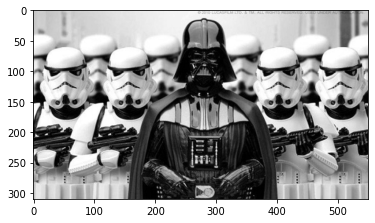

In [40]:
#Metódo Grayscale - Average [(r + g + b) / 3] 

(l, c, p) = img.shape

img_avg = np.zeros(shape=(l, c), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        r = float(img[i, j, 0])
        g = float(img[i, j, 1])
        b = float(img[i, j, 2])
        
        img_avg[i, j] = (r + g + b) / 3
        
plt.imshow(img_avg, cmap = 'gray')
print(img_avg.shape)

**c)** Faça a detecção de bordas da imagem anterior utilizando o método diferencial. Use threshold = 60. Exiba o resultado.

In [41]:
#Acho que não foi explicado

**d)** Carregue a imagem **galaxy.jpg** presente na pasta e mostre na tela. Verifique a presença do canal alfa e faça o devido tratamento caso ele exista.

(310, 550, 3)


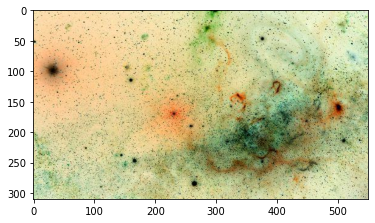

In [42]:
img_galaxy = np.array(Image.open('galaxy.jpeg'))
print(img_galaxy.shape) #Imprime o valor matricial [310, 550, 3] -----> Não há canal alfa
plt.imshow(img_galaxy)

**d)** Converta a imagem da questão anterior para o espaço RGB. Exiba o resultado.

(310, 550, 3)


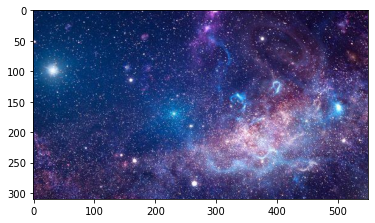

In [43]:
img_galaxy_RGB = (255 - img_galaxy) / 255

plt.imshow(img_galaxy_RGB)
print(img_galaxy_RGB.shape)

**e)** Utilize a imagem da questão **C** como máscara para a imagem anterior. Exiba o resultado.

Número de linhas: 310
Número de colunas: 550
Linhas em branco: de 77 até 232
Colunas em branco: de 137 até 412


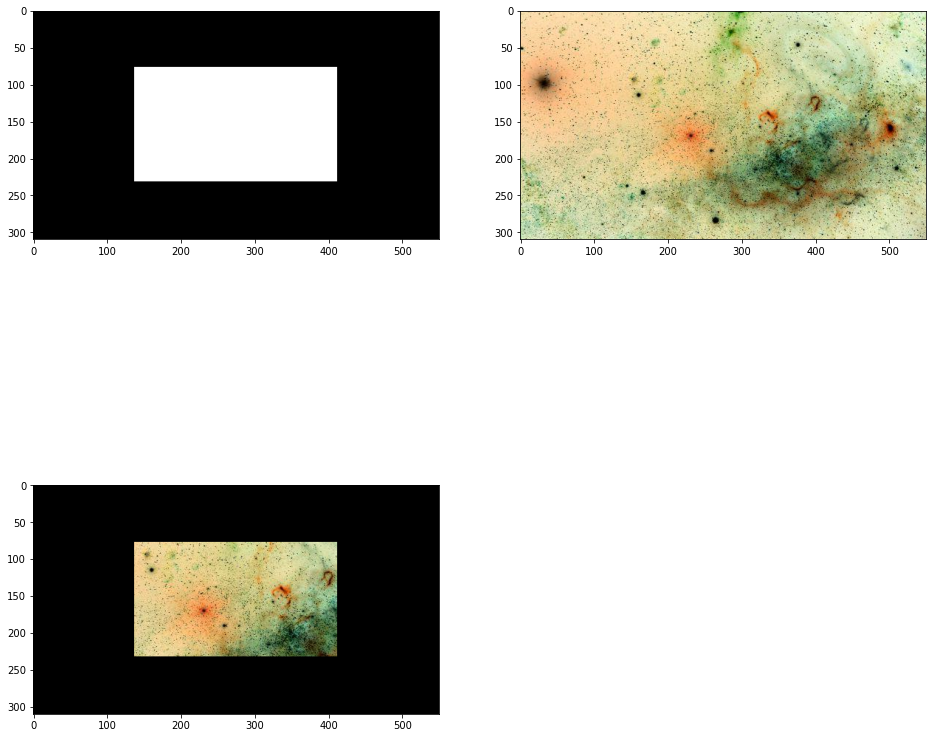

In [44]:
# lógica bit e bit, portanto as imgs têm que ter o msm tamanho

mask = np.zeros(shape= img_galaxy.shape, dtype=np.uint8) # matriz zerada

# conta para determinar a região do branco
mask[ img_galaxy.shape[0] // 4: img_galaxy.shape[0] * 3 // 4, # linhas, eixo y
      img_galaxy.shape[1] // 4: img_galaxy.shape[1] * 3 // 4, # colunas, eixo x
     :] = 255 # todas as paginas -> pinta todas de branco (255)


img_building_masked = img_galaxy & mask



print('Número de linhas: {}'.format(img_galaxy.shape[0]))
print('Número de colunas: {}'.format(img_galaxy.shape[1]))
print('Linhas em branco: de {} até {}'.format(img_galaxy.shape[0] // 4, img_galaxy.shape[0] * 3 // 4))
print('Colunas em branco: de {} até {}'.format(img_galaxy.shape[1] // 4,img_galaxy.shape[1] * 3 // 4))



plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.imshow(mask)
plt.subplot(2, 2, 2)
plt.imshow( img_galaxy)
plt.subplot(2, 2, 3)
plt.imshow(img_building_masked)

Número de linhas: 310
Número de colunas: 550
Linhas em branco: de 77 até 232
Colunas em branco: de 137 até 412


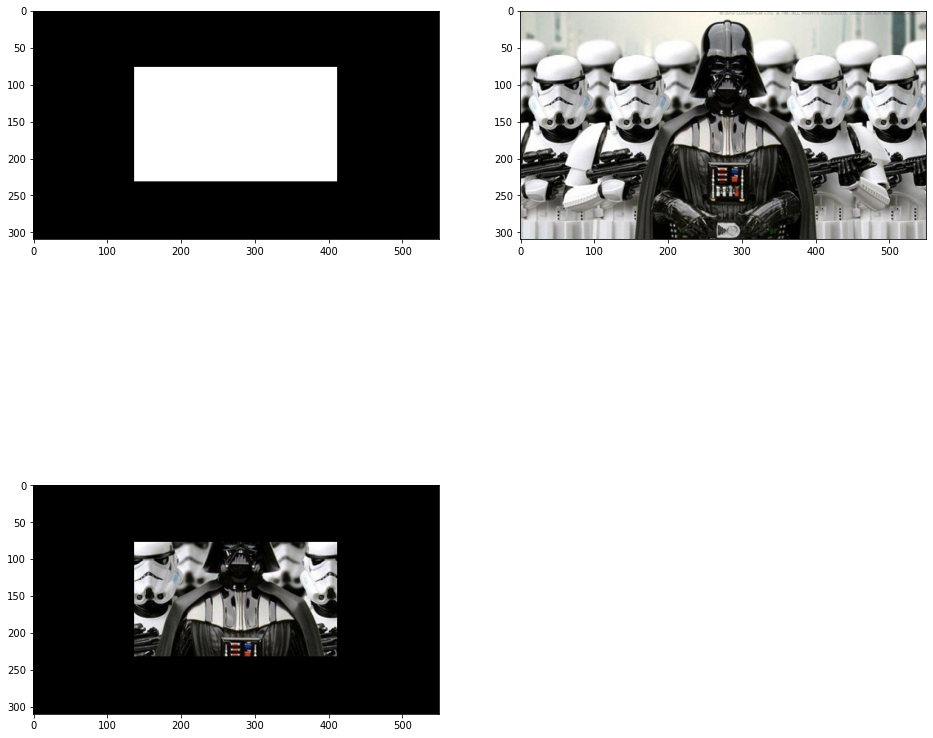

In [45]:
# lógica bit e bit, portanto as imgs têm que ter o msm tamanho

mask_DV = np.zeros(shape= img.shape, dtype=np.uint8) # matriz zerada

# conta para determinar a região do branco
mask_DV[ img.shape[0] // 4: img.shape[0] * 3 // 4, # linhas, eixo y
      img.shape[1] // 4: img.shape[1] * 3 // 4, # colunas, eixo x
     :] = 255 # todas as paginas -> pinta todas de branco (255)

img_building_masked = img & mask_DV



print('Número de linhas: {}'.format(img.shape[0]))
print('Número de colunas: {}'.format(img.shape[1]))
print('Linhas em branco: de {} até {}'.format(img.shape[0] // 4, img.shape[0] * 3 // 4))
print('Colunas em branco: de {} até {}'.format(img.shape[1] // 4,img.shape[1] * 3 // 4))



plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.imshow(mask_DV)
plt.subplot(2, 2, 2)
plt.imshow(img)
plt.subplot(2, 2, 3)
plt.imshow(img_building_masked)

**f)** Aplique uma tintura na imagem obtida na questão **B**. A cor deverá ser LightSeaGreen = (32,178,170). Exiba o resultado.

In [52]:

#grayscale = np.average(img_avg, axis=2)
#tinted = np.zeros(shape=img_np.shape, dtype=np.uint8)

# laranja em RGB: (255, 127, 0)
# escala vermelho em 255 / 255 = 1
#tinted[:, :, 0] = grayscale * (32 / 255)
# escala verde em 127 / 255 ~= 0.5
#tinted[:, :, 1] = grayscale * (178 / 255)
# escala azul em 0 / 255 = 0
#tinted[:, :, 2] = grayscale * (170 / 255)

#plt.figure(figsize=(16, 16))
#plt.subplot(1, 2, 1)
#plt.imshow(tinted)

**g)** Espelhe a imagem da questão anterior no eixo X. Exiba o resultado.